In [49]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime 

In [2]:
# LOAD CSV
df = pd.read_csv('sentiment_analysis.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15167 entries, 0 to 15166
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerKey            15167 non-null  int64  
 1   WebActivity            15167 non-null  int64  
 2   Sentiment Analysis     15167 non-null  object 
 3   SentimentRating        15167 non-null  int64  
 4   MaritalStatus          15167 non-null  object 
 5   Gender                 15167 non-null  object 
 6   EstimatedYearlyIncome  15167 non-null  int64  
 7   NumberOfContracts      15167 non-null  int64  
 8   Age                    15167 non-null  int64  
 9   Target                 15167 non-null  int64  
 10  Available401K          15167 non-null  int64  
 11  CustomerValueSegment   15167 non-null  int64  
 12  ChurnScore             15167 non-null  float64
 13  CallActivity           15167 non-null  int64  
 14  Products               15167 non-null  object 
 15  bi

In [3]:
df.describe()

,CustomerKey,WebActivity,SentimentRating,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity
count,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000
mean,17559.847102,0.999473,1.850926,57718.072130,1.465484,48.203402,0.486781,0.696380,2.097251,0.268893,3.236896
std,5576.039383,1.519967,1.619925,32091.910319,1.144962,11.300184,0.499842,0.459836,0.688901,0.332298,1.262360
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,29.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12256.500000,0.000000,0.000000,30000.000000,1.000000,40.000000,0.000000,0.000000,2.000000,0.000000,2.000000
50%,14967.000000,0.000000,2.000000,60000.000000,1.000000,46.000000,0.000000,1.000000,2.000000,0.100000,3.000000
75%,23045.500000,2.000000,3.000000,70000.000000,2.000000,56.000000,1.000000,1.000000,3.000000,0.500000,4.000000
max,27336.000000,5.000000,5.000000,170000.000000,4.000000,100.000000,1.000000,1.000000,3.000000,1.000000,5.000000


<Axes: xlabel='Sentiment Analysis', ylabel='Count'>

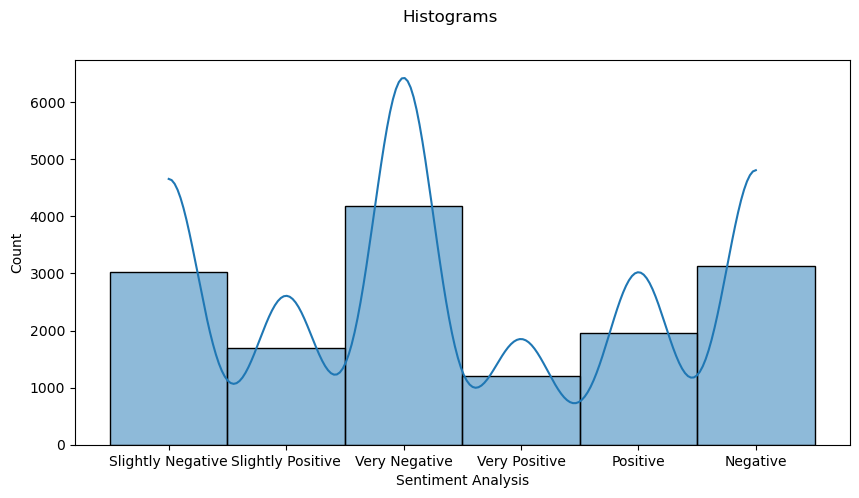

In [4]:
#STATISTICAL DISPERSION

fig,axs = plt.subplots(1,1,figsize=(10,5))
fig.suptitle('Histograms')
sns.histplot(df['Sentiment Analysis'],kde=True)

<Axes: >

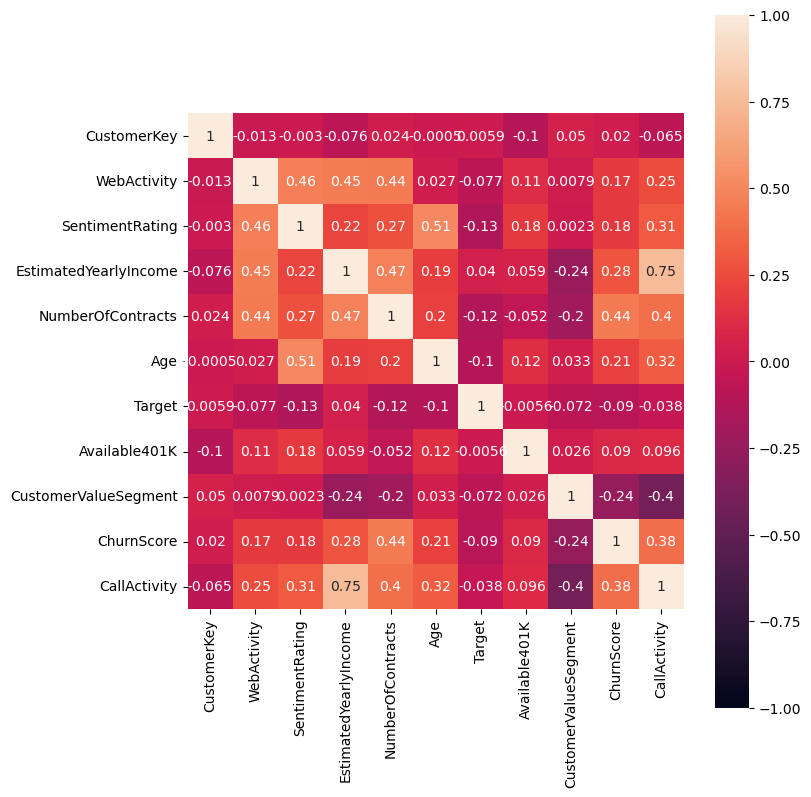

In [5]:
# CORRELATION

corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(8,9))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)

c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


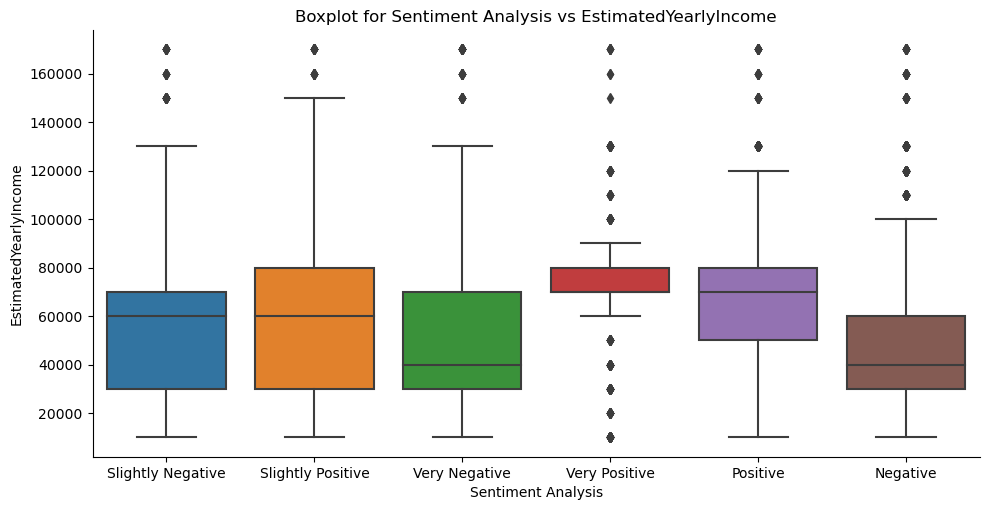

In [6]:
#sns.pairplot(df)

# BOX PLOTS - outliers
sns.catplot(x="Sentiment Analysis",y="EstimatedYearlyIncome",data=df, kind="box", aspect=2)
plt.title("Boxplot for Sentiment Analysis vs EstimatedYearlyIncome")
plt.show()



In [7]:
# MISSING VALUES
df.isna().sum()
# admitindo que existia MV em EstimatedYearlyIncome usando o metodo nearest
df['EstimatedYearlyIncome'].interpolate(method="nearest")  
print("Linhas duplicadas:"+str(df.duplicated().sum()))

Linhas duplicadas:16


In [8]:
# Remoção de duplicados
df.drop_duplicates()

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,Available401K,CustomerValueSegment,ChurnScore,CallActivity,Products,birthday
0,11000,0,Slightly Negative,2,M,M,90000,0,44,1,1,1,0.1,4,private investment,1972-01-14
1,11000,0,Slightly Negative,2,M,M,90000,0,44,1,1,1,0.1,4,private investment,1971-08-28
2,11001,3,Slightly Positive,3,S,M,60000,1,45,1,0,1,0.0,4,private investment,1970-06-26
3,11001,3,Slightly Positive,3,S,M,60000,1,45,1,0,1,0.0,4,private investment,1971-02-11
4,11002,3,Slightly Positive,3,M,M,60000,1,45,1,1,1,0.2,4,private investment,1971-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,13748,0,Positive,4,M,M,80000,0,52,0,1,2,0.1,3,fund manager+,1963-12-10
15163,12104,1,Positive,4,M,F,70000,2,61,1,1,2,1.0,4,p+b investment,1954-11-05
15164,12104,1,Positive,4,M,F,70000,2,61,1,1,2,1.0,4,p+b investment,1954-12-19
15165,13120,5,Very Positive,5,M,M,80000,4,45,0,1,1,0.0,4,private investment,1971-03-18


In [41]:
# BINNING
bins = pd.qcut(df['Age'],q=3,precision=0)
bins.value_counts().sort_index()

Age
(28.0, 42.0]     5460
(42.0, 52.0]     4796
(52.0, 100.0]    4911
Name: count, dtype: int64

In [9]:
# BINNING
estimator = preprocessing.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
df['age_binned']= estimator.fit_transform(df[['Age']])
print('Bin Edges')
print(estimator.bin_edges_[0])
print('Age Groups')
print(df.groupby(by=['age_binned']).count())

Bin Edges
[ 29.  42.  52. 100.]
Age Groups
            CustomerKey  WebActivity  Sentiment Analysis  SentimentRating  \
age_binned                                                                  
0.0                4906         4906                4906             4906   
1.0                4946         4946                4946             4946   
2.0                5315         5315                5315             5315   

            MaritalStatus  Gender  EstimatedYearlyIncome  NumberOfContracts  \
age_binned                                                                    
0.0                  4906    4906                   4906               4906   
1.0                  4946    4946                   4946               4946   
2.0                  5315    5315                   5315               5315   

             Age  Target  Available401K  CustomerValueSegment  ChurnScore  \
age_binned                                                                  
0.0         4906    4

In [46]:
years = []
months = []
days = []

for dia in df['birthday']:
    comps = dia.split("-")
    years.append(comps[0])
    months.append(comps[1])
    dt = datetime(int(comps[0]),int(comps[1]),int(comps[2]))
    days.append(dt.strftime('%A'))

In [47]:
#df.drop(labels=['years','months','days'],axis=1)
df

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,...,CallActivity,Products,birthday,age_binned,years,months,days,month,year,weekday
0,11000,0,Slightly Negative,2,M,M,90000,0,44,1,...,4,private investment,1972-01-14,1.0,1972,01,Friday,01,1972,Friday
1,11000,0,Slightly Negative,2,M,M,90000,0,44,1,...,4,private investment,1971-08-28,1.0,1971,08,Saturday,08,1971,Saturday
2,11001,3,Slightly Positive,3,S,M,60000,1,45,1,...,4,private investment,1970-06-26,1.0,1970,06,Friday,06,1970,Friday
3,11001,3,Slightly Positive,3,S,M,60000,1,45,1,...,4,private investment,1971-02-11,1.0,1971,02,Thursday,02,1971,Thursday
4,11002,3,Slightly Positive,3,M,M,60000,1,45,1,...,4,private investment,1971-01-27,1.0,1971,01,Wednesday,01,1971,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,13748,0,Positive,4,M,M,80000,0,52,0,...,3,fund manager+,1963-12-10,2.0,1963,12,Tuesday,12,1963,Tuesday
15163,12104,1,Positive,4,M,F,70000,2,61,1,...,4,p+b investment,1954-11-05,2.0,1954,11,Friday,11,1954,Friday
15164,12104,1,Positive,4,M,F,70000,2,61,1,...,4,p+b investment,1954-12-19,2.0,1954,12,Sunday,12,1954,Sunday
15165,13120,5,Very Positive,5,M,M,80000,4,45,0,...,4,private investment,1971-03-18,1.0,1971,03,Thursday,03,1971,Thursday


In [51]:
#Remover utilizadores da plataforma que tenham, ao mesmo tempo, uma atividade na plataforma («WebActivity») inferior a 1 hora e que tenham mais de 70 anos;
df_clean = df.drop(df.loc[(df['WebActivity']<1) & (df['Age']>70)].index)
df_clean

,CustomerKey,WebActivity,Sentiment Analysis,SentimentRating,MaritalStatus,Gender,EstimatedYearlyIncome,NumberOfContracts,Age,Target,...,CallActivity,Products,birthday,age_binned,years,months,days,month,year,weekday
0,11000,0,Slightly Negative,2,M,M,90000,0,44,1,...,4,private investment,1972-01-14,1.0,1972,01,Friday,01,1972,Friday
1,11000,0,Slightly Negative,2,M,M,90000,0,44,1,...,4,private investment,1971-08-28,1.0,1971,08,Saturday,08,1971,Saturday
2,11001,3,Slightly Positive,3,S,M,60000,1,45,1,...,4,private investment,1970-06-26,1.0,1970,06,Friday,06,1970,Friday
3,11001,3,Slightly Positive,3,S,M,60000,1,45,1,...,4,private investment,1971-02-11,1.0,1971,02,Thursday,02,1971,Thursday
4,11002,3,Slightly Positive,3,M,M,60000,1,45,1,...,4,private investment,1971-01-27,1.0,1971,01,Wednesday,01,1971,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15162,13748,0,Positive,4,M,M,80000,0,52,0,...,3,fund manager+,1963-12-10,2.0,1963,12,Tuesday,12,1963,Tuesday
15163,12104,1,Positive,4,M,F,70000,2,61,1,...,4,p+b investment,1954-11-05,2.0,1954,11,Friday,11,1954,Friday
15164,12104,1,Positive,4,M,F,70000,2,61,1,...,4,p+b investment,1954-12-19,2.0,1954,12,Sunday,12,1954,Sunday
15165,13120,5,Very Positive,5,M,M,80000,4,45,0,...,4,private investment,1971-03-18,1.0,1971,03,Thursday,03,1971,Thursday


In [74]:
#Por «Sentiment Analysis», obter a moda dos restantes atributos;

df.groupby(['Sentiment Analysis']).agg({'Products': pd.Series.mode, 'Age': pd.Series.mode})

,Products,Age
Sentiment Analysis,,
Negative,private investment,48
Positive,private investment,46
Slightly Negative,p+b investment,53
Slightly Positive,p+b investment,45
Very Negative,private investment,36
Very Positive,private investment,65


In [79]:
df.groupby(['Sentiment Analysis','MaritalStatus']).agg({'Age': pd.Series.mean,'EstimatedYearlyIncome':pd.Series.mean})

Age  EstimatedYearlyIncome
Sentiment Analysis MaritalStatus                                  
Negative           M              48.125615           50701.832812
                   S              47.014689           52768.361582
Positive           M              55.000000           70591.572123
                   S              52.256198           65757.575758
Slightly Negative  M              56.707471           60718.390805
                   S              51.681995           52852.689010
Slightly Positive  M              54.408377           68324.607330
                   S              50.582313           54462.585034
Very Negative      M              37.770609           55763.440860
                   S              37.593233           49514.038877
Very Positive      M              54.011862           74543.297746
                   S              54.087079           66067.415730

In [117]:
# PREMIER LEAGUE
df = pd.read_csv('EPL_Player_Stats_2017_2018.csv')
#print(df.info())

#print(df.isna().sum()) # nationality 1 missing value
# tratar missing value
row = df.loc[(df['nationality'].isna())].index[0] # row id with null nationality
print(df.loc[[row]])
# change value in row index
df.at[row,'nationality']='eng ENG/gh GHA'
print("Linhas duplicadas:"+str(df.duplicated().sum()))
df.loc[[row]] # mostar row atualizada

      id  pens_made  goals_assists_per90 position  fouls  goals  \
488  488          0                  0.0       MF      0      0   

                 player  goals_assists_pens_per90    squad  goals_per90  ...  \
488  Callum Hudson-Odoi                       0.0  Chelsea          0.0  ...   

     games  cards_yellow  cards_red  nationality  assists  minutes  \
488      2             0          0          NaN        0       29   

     fouls_per90  age  shots_on_target pens_att  
488          0.0   16                1        0  

[1 rows x 26 columns]
Linhas duplicadas:0


,id,pens_made,goals_assists_per90,position,fouls,goals,player,goals_assists_pens_per90,squad,goals_per90,...,games,cards_yellow,cards_red,nationality,assists,minutes,fouls_per90,age,shots_on_target,pens_att
488,488,0,0.0,MF,0,0,Callum Hudson-Odoi,0.0,Chelsea,0.0,...,2,0,0,eng ENG/gh GHA,0,29,0.0,16,1,0


In [120]:
# adicionar coluna com total de cartoes | iterar pelo dataset
totalcards=[]
for ind in df.index:
    total = df['cards_yellow'][ind]+df['cards_red'][ind]
    totalcards.append(total)
df['total_cards'] = totalcards
df.groupby(by=['squad']).agg({'total_cards':pd.Series.sum}).sort_values(by='total_cards',ascending=False)
#df.loc[(df['squad']=="Leicester City")] => selecionar as rows que squad == LEICESTER CITY

,total_cards
squad,
West Ham United,74
West Bromwich Albion,74
Crystal Palace,72
Watford,68
Southampton,66
Huddersfield Town,66
Manchester United,63
Stoke City,63
Manchester City,63


In [130]:
# TOP 10 ASSISTENCIAS
df.groupby(by=['player']).agg({'assists':pd.Series.sum}).sort_values(by='assists',ascending=False).head(10)

,assists
player,
Kevin De Bruyne,16
Leroy Sané,15
Raheem Sterling,11
David Silva,11
Dele Alli,10
Mohamed Salah,10
Riyad Mahrez,10
Paul Pogba,10
Christian Eriksen,10


In [131]:
#Qual é o top-5 de nacionalidades nesta edição da Premier League
df.groupby(by=['nationality']).agg({'player':pd.Series.count}).sort_values(by='player',ascending=False).head(5)

,player
nationality,
eng ENG,174
es ESP,31
fr FRA,29
nl NED,23
be BEL,21
